In [1]:
# Importo las librerias necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargo el conjunto de datos
dataset__route = "data/basic3.csv"
dataset_df = pd.read_csv(dataset__route)

# Muestro los 5 primeros ejemplos del dataset
dataset_df.head(5)

,x,y,color
0,591.141815,339.509605,1
1,152.000000,337.000000,0
2,306.383225,304.362656,2
3,532.384613,279.305239,1
4,231.786211,216.340788,2


In [4]:
# Instancio un objeto de la clase MinMaxScaler
scaler = MinMaxScaler()

# Normalizo los valores del conjunto de datos
dataset = scaler.fit_transform(dataset_df[["x", "y"]])
dataset

array([[0.83697553, 0.68078988],
       [0.1763699 , 0.67516671],
       [0.4086102 , 0.60203754],
       ...,
       [0.05975429, 0.46571067],
       [0.22788217, 0.30713811],
       [0.13829506, 0.15781215]])

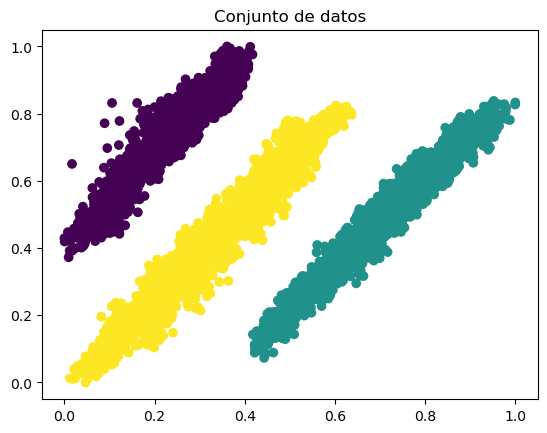

In [5]:
# Represento el conjunto de datos en un eje bidimensional
plt.figure()
plt.scatter(dataset[:, 0], dataset[:, 1], c = dataset_df['color'])
plt.title("Conjunto de datos")
plt.show()

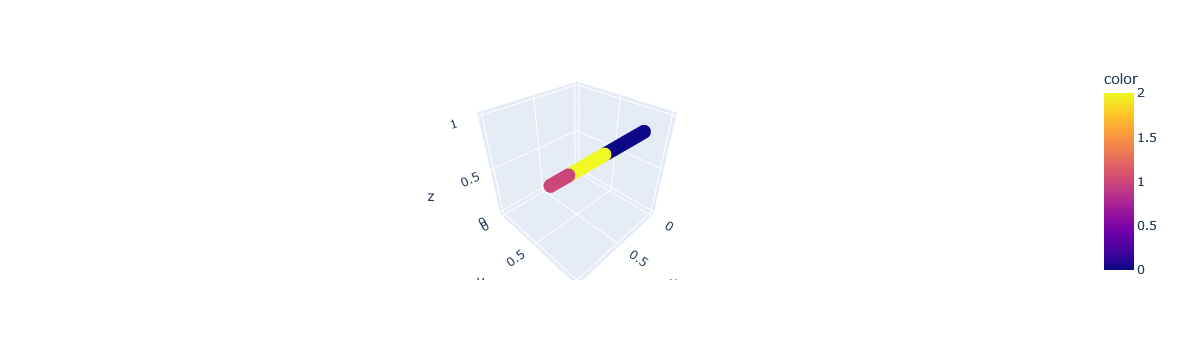

In [7]:
# Represento el dataset en un mapa tridimensional con Plotly
fig = px.scatter_3d(dataset, dataset[:, 0], dataset[:, 1],  dataset[:, 1], color = dataset_df['color'])
fig.show()

In [14]:
# Entreno un modelo de clustering Spectral Clustering
from sklearn.cluster import SpectralClustering

n_clusters = 3
model  = SpectralClustering(n_clusters = n_clusters)

# Entreno el modelo
model.fit(dataset)

SpectralClustering(n_clusters=3)

In [15]:
# Defino una variable con las etiquetas asignadas por el modelo a los diferentes puntos
labels = model.labels_

labels

array([2, 0, 0, ..., 0, 1, 1])

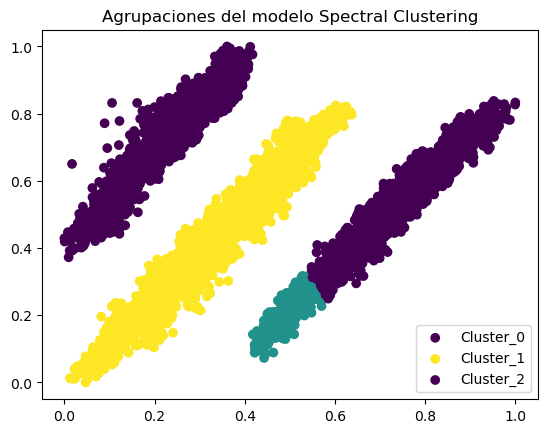

In [16]:
# Grafico las agrupaciones del modelo
plt.figure()

for _ in range(n_clusters):
    plt.scatter(dataset[labels == _][:, 0], dataset[labels == _][:, 1], c = dataset_df['color'][labels == _], label = f"Cluster_{_}")

plt.title("Agrupaciones del modelo Spectral Clustering")
plt.legend()
plt.show()

In [35]:
# Entreno ahora un modelo DBSCAN
from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 0.10)
model.fit(dataset)

DBSCAN(eps=0.1)

In [36]:
# Obtengo las etiquetas de los ejemplos asignadas por el modelo DBSCAN
labels = model.labels_
labels

array([0, 1, 2, ..., 1, 2, 2], dtype=int64)

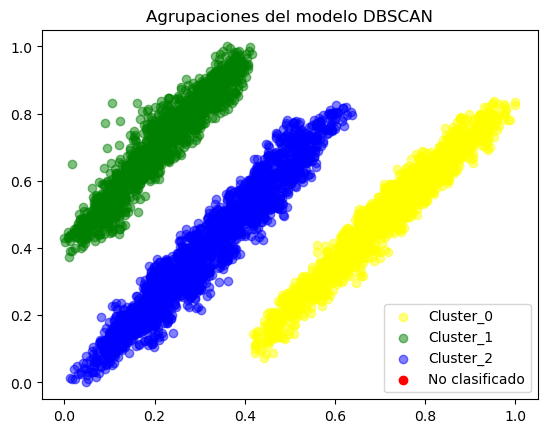

In [37]:
# Grafico las agrupaciones del modelo DBSCAN
plt.figure()

colors = ['yellow', 'green', 'blue']

for _ in range(n_clusters):
    plt.scatter(dataset[labels == _][:, 0], dataset[labels == _][:, 1], c = colors[_], alpha = 0.5, label = f"Cluster_{_}")

# Grafico los puntos no agrupados por el modelo
plt.scatter(dataset[labels == -1][:, 0], dataset[labels == -1][:, 1], c = "red", label = "No clasificado")
plt.title("Agrupaciones del modelo DBSCAN")
plt.legend()
plt.show()

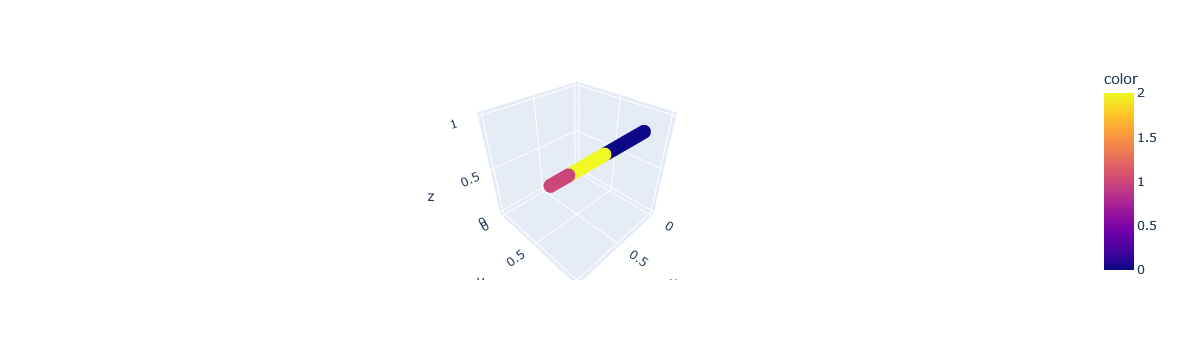

In [39]:
fig = px.scatter_3d(dataset, dataset[labels != -1][:, 0], dataset[labels != -1][:, 1], dataset[labels != -1][:, 1], color = dataset_df['color'])
fig.show()